## Practical 4 - Uninformed Search Part II

### Question 1.1

Programatically we want to look at how the queue grows and how many iterations the algorithm takes to get to a solution. After the execution has been completed we want to look at the quality of the path. We can only consider quality of the path in terms of number of visited nodes because uninformed search does not have anything else to work with. Uninformed search, for example, does not know if it is expanding paths that are taking it away from the goal node.

### Question 1.2

This is the case because the algorithm follows the first path it expanded until it cannot go any further. Only then it backtracks to explore the nearest alternative paths it did not explore.

### Question 1.3

Backtracking means that when the algorithm is exploring an open path and cannot expand anymore it goes back to the nearest alternative unexplored node on the same tree of open paths. Eventually backtracking can go all the way back to the starting node from where other paths may be explored. DFS backtracks, while BFS does not. BFS does not backtrack because it explores a number of paths in parallel starting with those that are accessible via one expansion, then two, and so on. In other words, BFS does not go until it cannot expand anymore then looking for the nearest unexplored alternative path. This is an important point.

### Question 1.4

British Museum means expanding all possible paths and exploring all of them. The completed code looks follows, it expands all the paths in a DFS fashion but it is not DFS in the strict sense of the word because it expands several paths that go through the same node.

In [ ]:
def bm_paths(graph, start, goal):
    q = [(start, [start])]
    while q:
        (vertex, path) = q.pop(0)
        for next in graph[vertex] - set(path):
            if next == goal:
                print('yielding')
                yield path + [next]
                
            else:
                q.append((next, path + [next]))

### Question 2.1

The code is valid and works as expected. You must realise that the mechanism that keeps *visited nodes* and does not expand new paths from them once they have been marked as visited once is the core improvement DFS and BFS make over the British Museum algorithm.

The implementation of the second approach is equivalent to the BM algorithm above, with the difference that the algorithm ends when the goal node is found, and we have an argument to tell it whether we want DFS or BFS

In [6]:
# this is one of the ways in which we can represent our search graph
# the example below corresponds to the same graph we used in the lecture

g = { 
    's': {'a','b','c'},
    'a': {'b','d','s'},
    'b': {'d','h','s'},
    'c': {'l','s'},
    'd': {'a','b', 'f'},
    'e': {'g','k'},
    'f': {'d','h'},
    'g': {'e','h'},
    'h': {'b','f', 'g'},
    'i': {'j','k', 'l'},
    'j': {'i','k', 'l'},
    'k': {'e','i', 'j'},
    'l': {'c','i', 'j'},
}

# the code below does be British museum DFS and BFS traversals
# that is, the one in which we keep the paths for each expanded node
# which results in all possible paths
# implementation uses *lazy* programming which means we are not declaring data types

def uninformed_search_b(graph, start, goal, option):
    q = [(start, [start])]
    # option 0: DFS
    # option 1: BFS
    enq = 1 # esta variavel é útil so para imprimir o tamanho da queue, não tem efeito no algoritmo
    i=0 # vamos manter um contador da iteração na qual estamos 
    while q:
        i+=1
        print('current q has ', q)
        h = q[0] #primeiro separo a q em cabeça e resto
        r = q[1:]
        print('iteration', i)
        print('q size starts', enq)
        if h[0] == goal: #pergunto se a cabeça é o nó objetivo
            print('found goal') # se é, acabou o programa
            break
        else:
            enq = enq - 1 # reduzimos a queue em um elemento porque a cabeça já era
            e_filter = [] # e faço a expansão do h, mas não considerando qualquer nó filho que já tenha sido visitado
            for node in graph[h[0]]: # para cada nó que é filho da cabeça atual (h)
                if node not in h[1]: # se o nó não estiver no caminho que conhecemos até agora para o h[0]
                    e_filter.append(node)
                    enq += 1 # cada nó filho vai produzir un novo tuplo a incluir na queue
            if option == 0: # DFS
                e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
                q =  sorted(e) + r
                print('q size end it', len(q))
            else: #BFS
                e = [(e_final, h[1] + e_final) for e_final in e_filter] 
                q = r + sorted(e)
                
                print('q size end it', len(q))
        print('- - - - ')
                    

In [7]:
uninformed_search_b(g,'s','e',0)

current q has  [('s', ['s'])]
iteration 1
q size starts 1
q size end it 3
- - - - 
current q has  [('a', ['s', 'a']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 2
q size starts 3
q size end it 4
- - - - 
current q has  [('b', ['s', 'a', 'b']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 3
q size starts 4
q size end it 5
- - - - 
current q has  [('d', ['s', 'a', 'b', 'd']), ('h', ['s', 'a', 'b', 'h']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 4
q size starts 5
q size end it 5
- - - - 
current q has  [('f', ['s', 'a', 'b', 'd', 'f']), ('h', ['s', 'a', 'b', 'h']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 5
q size starts 5
q size end it 5
- - - - 
current q has  [('h', ['s', 'a', 'b', 'd', 'f', 'h']), ('h', ['s', 'a', 'b', 'h']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 6
q size starts 5
q size end it 5
- - - - 
current q has  [('g', ['s', 'a', 'b', 'd', 'f', 'h', '

### Question 2.2

You must get the two approaches right and run the code on different problems, you need to make sure you agree that it makes sense to print, and analyse, the *number of iterations* your algorithms take to get a solution, as well as the the size of the queue throught the different iterations---both for DFS and BFS under the two approaches that solve the loops problem.

### Question 2.3

Yes it makes a lot of sense. if we want to get a true DFS and BFS implementation we want to mark nodes as visited and not explore them further. But, we may need to have access to the path found or paths explored, which in the original version, that adds the visited nodes variable, does not exist. Furthermore, if we want to visualise what the algororithms are doing we need to keep the different open paths that are being explored by the algorithm. The modified version is below

In [10]:
def uninformed_search_c(search_graph, start, goal, option):
    q = [(start, [start])]
    v = []
    # option 0: DFS
    # option 1: BFS
    enq = 1
    i=0 # vamos manter um contador da iteração na qual estamos 
    while q:
        i+=1
        #print('current q has ', q)
        h = q[0] #primeiro separo a q em cabeça e resto
        r = q[1:]
        #print('iteration', i)
        #print('q size starts', enq)
        if h[0] == goal: #pergunto se a cabeça é o nó objetivo
            print('found') # se é, acabou o programa
            break
        else:
            enq = enq - 1
            v.append(h[0]) # se não é, marco o h como "visitado"
            e_filter = [] # e faço a expansão do h, mas não considerando qualquer nó filho que já tenha sido visitado
            for node in search_graph[h[0]]:
                if node not in v:
                    e_filter.append(node)
                    enq += 1
            if option == 0: # DFS
                e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
                q =  sorted(e) + r
                #print('q size end it', len(q))
            else: #BFS
                e = [(e_final, h[1] + [ex]) for e_final in e_filter]
                q = r + sorted(e)   
                #print('q size end it', len(q))
        #print('- - - - ')


In [11]:
uninformed_search_c(g,'s','e',0)

found


### Question 3.1

Not a lot to say here, probably the main thing is that you need to realise that if we keep the path between two nodes a and d as a list, e.g. [a,b,c,d] you will need to write a function that outputs the edges as tuples:

[(a,b), (b,c), (c,d)] which is what networkx wants to see. This is implemented below.

### Question 3.2 

Answer in the code below

### Question 3.3

No answer to give here, they need to look at the documentation, play with networkx and matplotlib. It is important to realise that using Jupyter brings some issues with matplotlib and they need to play with the magiks e.g. 
%matplotlib notebook or 
%matplotlib inline 

Encourage them to research what these do, and to self-teach themselves the basics of matplotlib necessary to make things with networkx work

### Question 3.4 

Code implemented below. I am still not painting the start node green and end node red. Will do that and update this solution but this is a minor thing really the most important thing is for them to visualise the open path the algorithm explores in every iteration 

In [4]:
# We are not publishing a solution for this question at this point, 
# but below you will find an example of what the search graph visualisations should look like

<IPython.core.display.Javascript object>


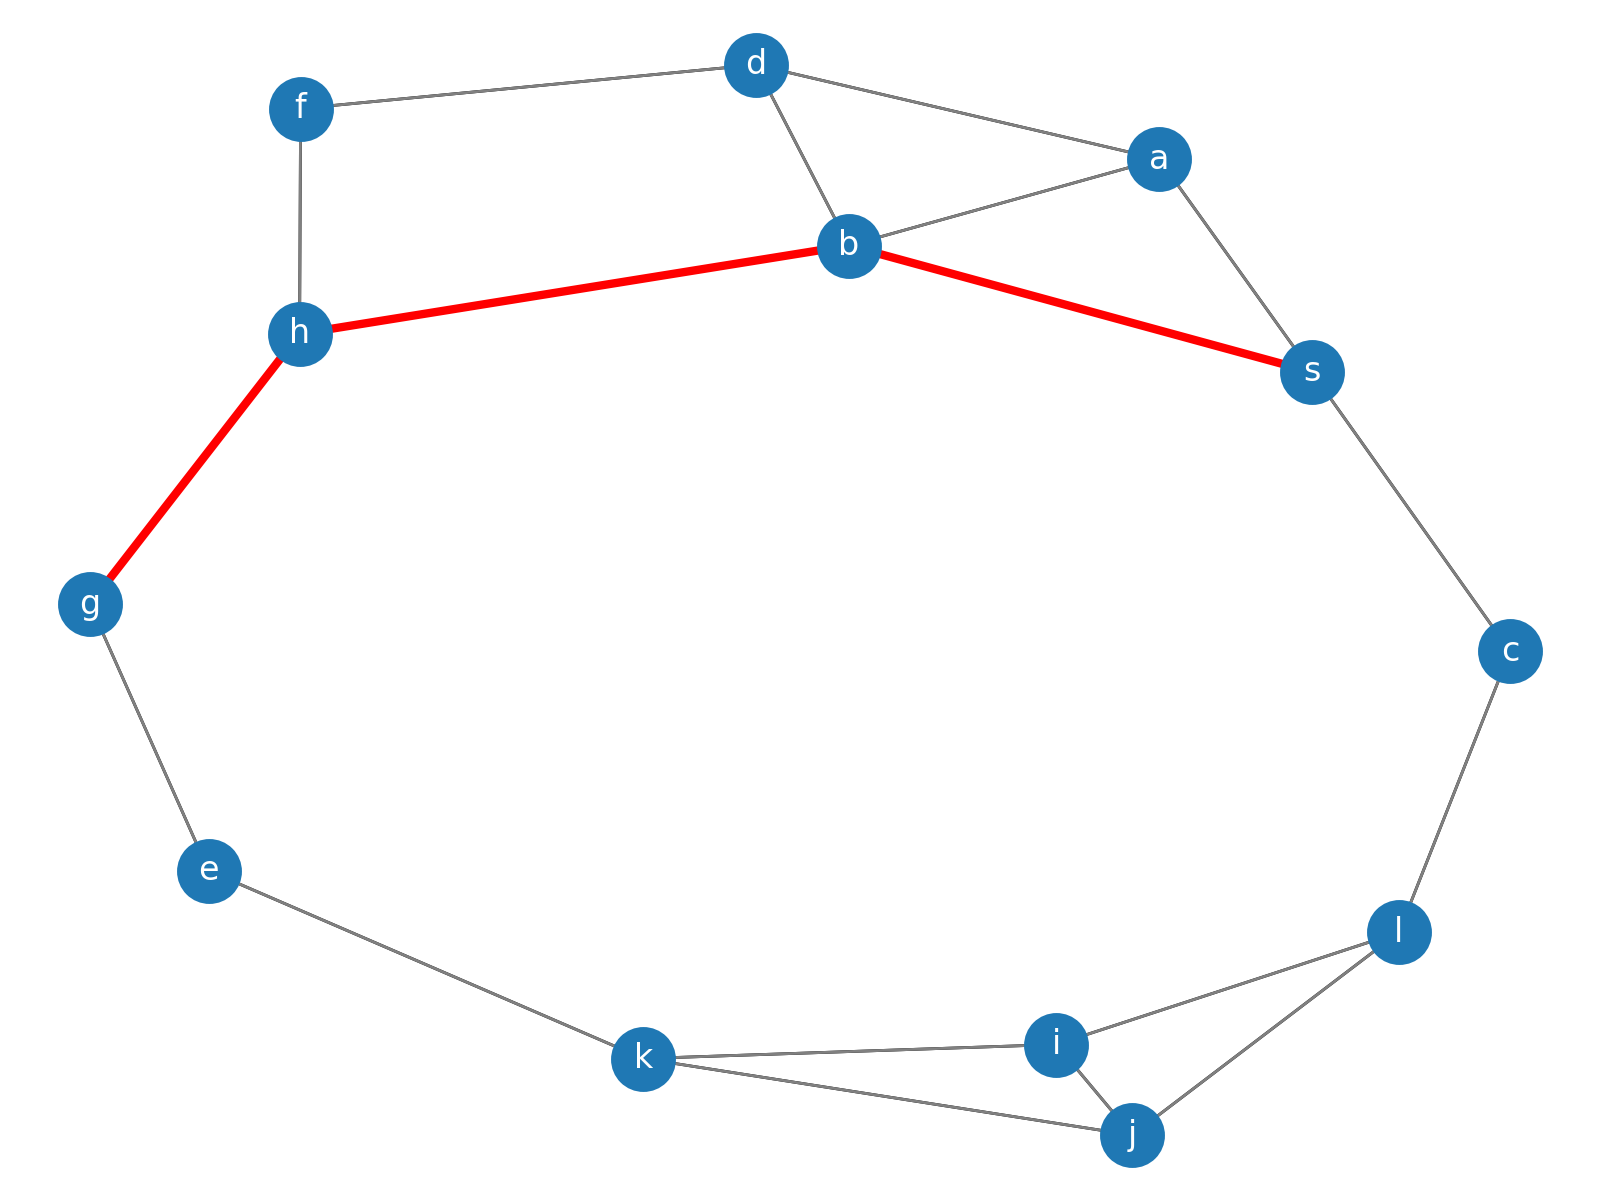

/Users/manuel/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
findfont: Font family ['DIN Pro'] not found. Falling back to DejaVu Sans.


{'s': array([0.39609774, 0.38266048]), 'a': array([0.27221823, 0.76811743]), 'b': array([0.02003706, 0.61149252]), 'c': array([ 0.5573352 , -0.12362375]), 'd': array([-0.05579859,  0.93892953]), 'e': array([-0.50030226, -0.520881  ]), 'f': array([-0.4255429 ,  0.85966405]), 'g': array([-0.5967261 , -0.03820102]), 'h': array([-0.42633169,  0.4515328 ]), 'i': array([ 0.18862793, -0.83576225]), 'j': array([ 0.25028558, -1.        ]), 'k': array([-0.14691133, -0.86123361]), 'l': array([ 0.46701113, -0.63269518])}
found


In [10]:
uninformed_search_d(g, 's', 'g', 1)